# Ravi Teja Reddy.S

## Task- 3 : To Explore Unsupervised Machine Learning

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
%matplotlib inline

##  Load the iris dataset

In [10]:
iris_data=pd.read_csv('Iris.csv')
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


##  Reading Data

In [11]:
iris_data.shape


(150, 6)

In [12]:
iris_data.isnull().sum()


Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [13]:
iris_data.describe()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [14]:
label_encode=LabelEncoder()
iris_data["Species"]=label_encode.fit_transform(iris_data["Species"])

In [15]:
iris_data.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [16]:
iris_data["Species"].unique()


array([0, 1, 2])

## Data Visualization¶


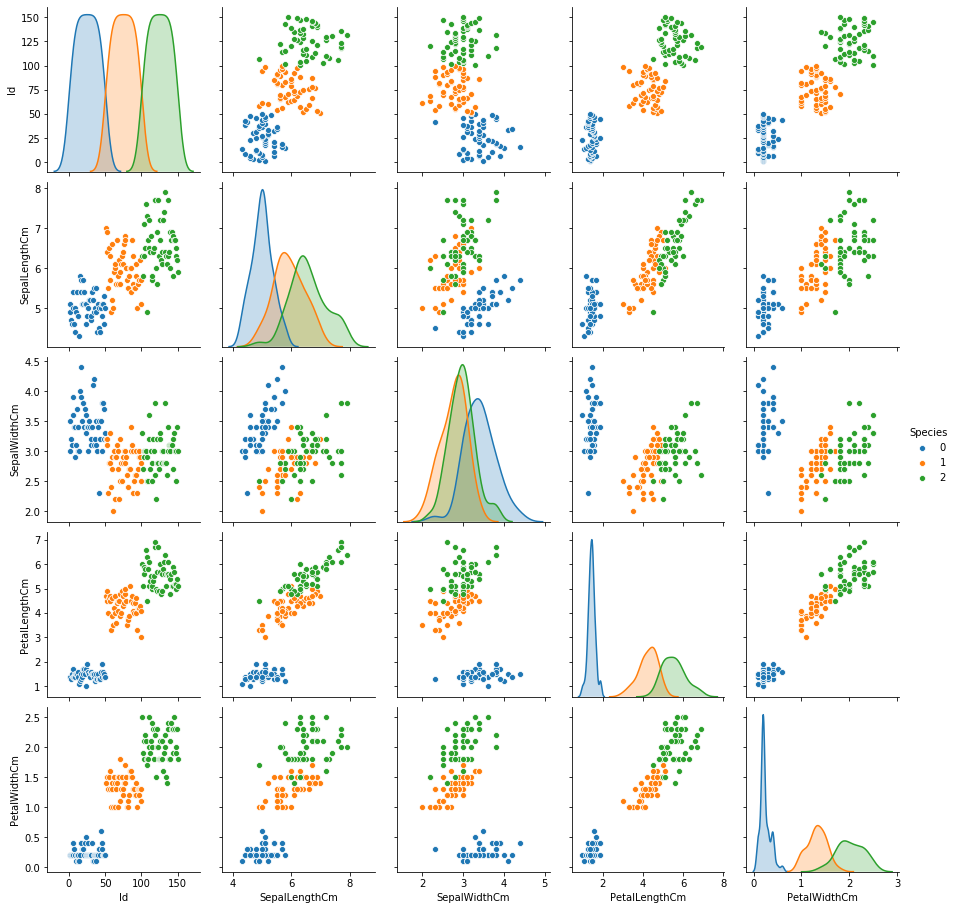

In [17]:
sns.pairplot(data=iris_data,hue='Species')


In [18]:
df=iris_data.iloc[:,1:5]
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


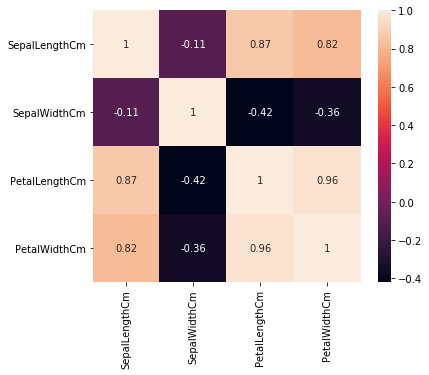

In [19]:
plt.figure(figsize=(6,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

## Preparing the Data

In [20]:
iris_data.drop(['Id'],axis=1,inplace=True)
X=iris_data.iloc[:,:-1].values

## Elbow method¶


In [21]:
wcss = []
for i in range(1,15): 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=i)
    kmeanModel.fit(X) 
    wcss.append(kmeanModel.inertia_)
print(wcss)

[680.8244, 152.36870647733906, 78.94084142614602, 57.31787321428571, 46.53558205128205, 38.94595367106237, 34.31265004600874, 29.993700643559343, 28.09701332162202, 26.175490259740265, 24.88762914862915, 22.760431066518024, 21.63671461871462, 20.137261904761907]


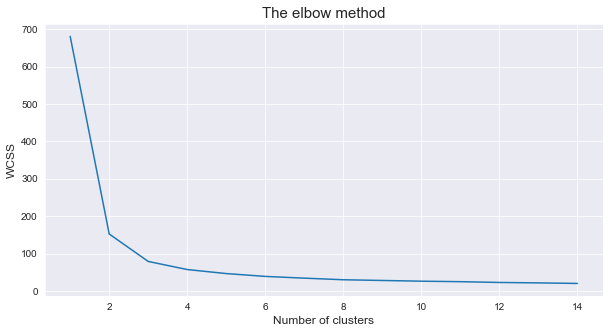

In [22]:

sns.set_style("darkgrid")
plt.figure(figsize=(10,5))
plt.plot(range(1,15),wcss)
plt.title('The elbow method',size=15)
plt.xlabel('Number of clusters',size=12)
plt.ylabel('WCSS',size=12) # Within cluster sum of squares
plt.show()

In [23]:

kmeans=KMeans(n_clusters=3)
classifier=kmeans.fit_predict(X)

In [24]:
df1=iris_data.copy()
df1['Cluster']=classifier
df1.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


## Visualizing the Clusters¶


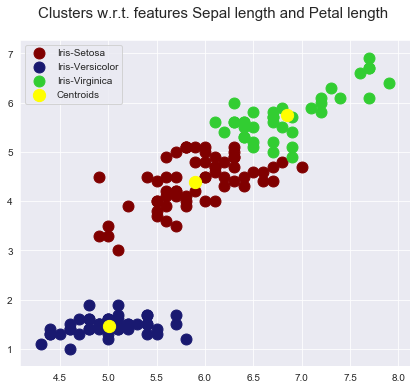

In [26]:
sns.set_style('darkgrid')
plt.figure(figsize=(7,6))
plt.title('Clusters w.r.t. features Sepal length and Petal length \n',size=15)

plt.scatter(X[classifier==0,0],X[classifier==0,2],s=120,c='maroon',label='Iris-Setosa')
plt.scatter(X[classifier==1,0],X[classifier==1,2],s=120,c='midnightblue',label='Iris-Versicolor')
plt.scatter(X[classifier==2,0],X[classifier==2,2],s=120,c='limegreen',label='Iris-Virginica')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,2],s=150,c='yellow',label='Centroids')

plt.legend()
plt.show()

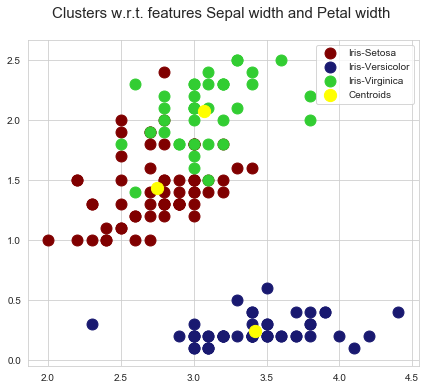

In [27]:
sns.set_style('whitegrid')
plt.figure(figsize=(7,6))
plt.title('Clusters w.r.t. features Sepal width and Petal width \n',size=15)

plt.scatter(X[classifier==0,1],X[classifier==0,3],s=120,c='maroon',label='Iris-Setosa')
plt.scatter(X[classifier==1,1],X[classifier==1,3],s=120,c='midnightblue',label='Iris-Versicolor')
plt.scatter(X[classifier==2,1],X[classifier==2,3],s=120,c='limegreen',label='Iris-Virginica')

plt.scatter(kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,3],s=150,c='yellow',label='Centroids')

plt.legend()
plt.show()

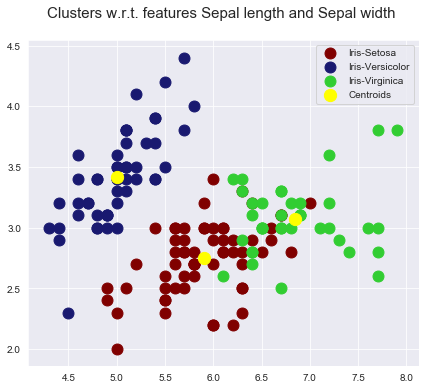

In [28]:
sns.set_style('darkgrid')
plt.figure(figsize=(7,6))
plt.title('Clusters w.r.t. features Sepal length and Sepal width \n',size=15)

plt.scatter(X[classifier==0,0],X[classifier==0,1],s=120,c='maroon',label='Iris-Setosa')
plt.scatter(X[classifier==1,0],X[classifier==1,1],s=120,c='midnightblue',label='Iris-Versicolor')
plt.scatter(X[classifier==2,0],X[classifier==2,1],s=120,c='limegreen',label='Iris-Virginica')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=150,c='yellow',label='Centroids')

plt.legend()
plt.show()